### Fig. S5

In [2]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import halfnorm
import os
import seaborn as sns
import sys
sns.set()
C_ATC = [0 ,10 ,20,40 ,60 ,80 ,100 ,150 ,250 ,500 ,750,1000]

In [4]:
def fold_change(lkns, el, gama,c, K=1):
    
    pref= 1/lkns -1
    numeratorfc = 1+np.exp(-el-gama)*((c/K)**2)
    denomenatorfc = 1+np.exp(-el)*((c/K)**2)
    
    FC = 1/(1+pref*numeratorfc/denomenatorfc)
    return FC

In [21]:
# Read in the 1000 sets of Prior Parameters
with open('prior_data_5d5_2d5_5_2d5_0d05.txt','r') as g: alllines=g.readlines()
Parameters=[]
for each in alllines[3][2:-3].split(']['):
    temp=[float(eac) for eac in each.split(',')]
    Parameters.append(temp)
print(np.shape(Parameters))

(1000, 4)


In [22]:
Us=[]
for each in alllines[5][2:-3].split(']['):
    temp=[]
    for eac in each.split(','):
        temp.append(float(eac))
    Us.append(temp)
print(np.shape(Us))

(1000, 12)


### Fig. S5A

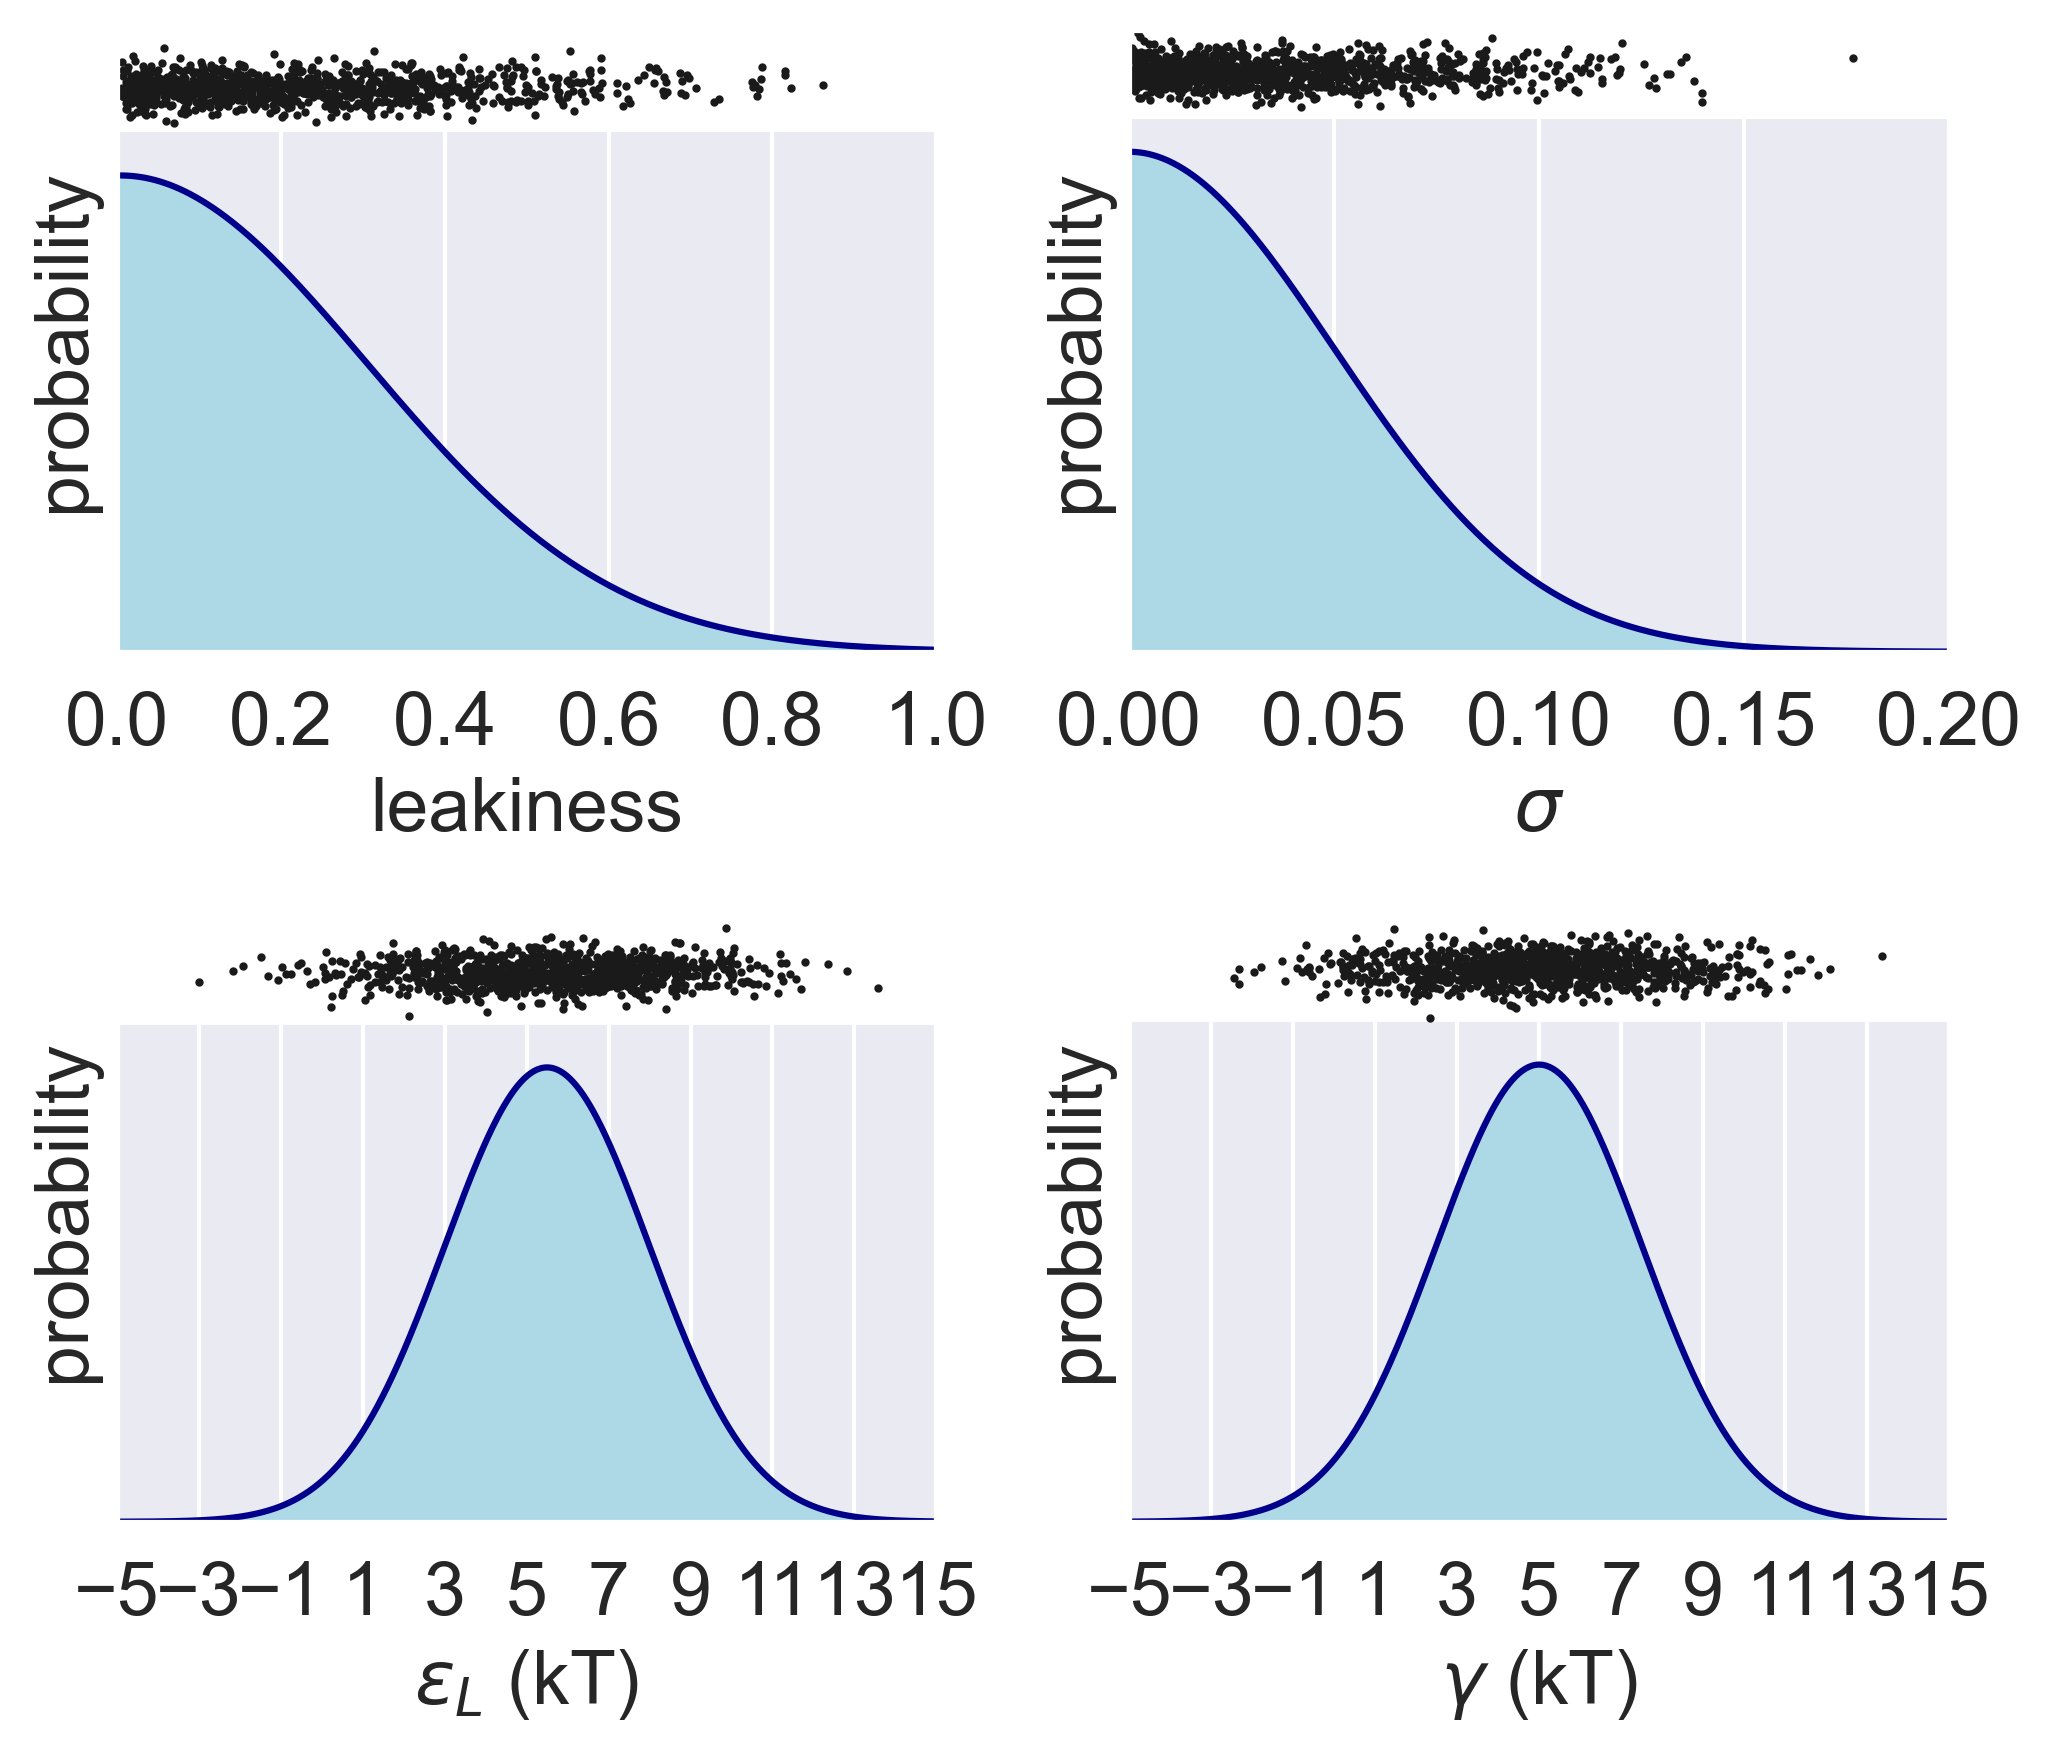

In [8]:
prior_param_dist = plt.figure(figsize=(7,6),dpi=300)

lablsiz=18

ppd1 = prior_param_dist.add_subplot(221)
lk_range= np.linspace(0.005,1.5,500)
lk_pdf= scipy.stats.halfnorm.pdf(lk_range, loc=0.005, scale=0.3)
ppd1.plot(lk_range, lk_pdf, color='darkblue', lw=1.5)
ppd1.fill_between(lk_range, lk_pdf, color='lightblue')
ppd1.hlines(3.19,0, 1, color='w', lw=25)
_y = np.ones(1000) * 3.15 + np.random.normal(0, 0.0675, size=1000)
ppd1.plot(np.asarray(Parameters)[:,0], _y, '.',markersize=2, color='k')
ppd1.set_yticks([])
ppd1.set_xlabel('leakiness',size=lablsiz)
ppd1.set_ylabel('probability',size=lablsiz)
ppd1.set_xticks(np.arange(0,1.01,0.2))
ppd1.set_xlim(0,1.)
ppd1.set_ylim(0,max(_y)+0.1)
ppd1.tick_params(labelsize=lablsiz)


ppd2 = prior_param_dist.add_subplot(222)
sig_range= np.linspace(0,0.2,500)
sig_pdf= scipy.stats.halfnorm.pdf(sig_range, loc=0, scale=0.05)
ppd2.plot(sig_range, sig_pdf, color='darkblue', lw=1.5)
ppd2.fill_between(sig_range, sig_pdf, color='lightblue')
ppd2.hlines(19,0, 0.2, color='w', lw=30)
_y = np.ones(1000) * 18.5 + np.random.normal(0, 0.4, size=1000)
ppd2.plot(np.asarray(Parameters)[:,3], _y, '.',markersize=2, color='k')
ppd2.set_xlabel('$\sigma$',size=lablsiz)
ppd2.set_ylabel('probability',size=lablsiz)
ppd2.set_yticks([])
ppd2.tick_params(labelsize=lablsiz)
ppd2.set_xticks(np.arange(0,0.21,0.05))
ppd2.set_xlim([0,0.2])
ppd2.set_ylim(0,max(_y)+0.1)


ppd3 = prior_param_dist.add_subplot(223)
el_range= np.linspace(-5,15,500)
el_pdf= scipy.stats.norm.pdf(el_range, loc=5.5, scale=2.5)
ppd3.plot(el_range, el_pdf, color='darkblue', lw=1.5)
ppd3.fill_between(el_range, el_pdf, color='lightblue')
ppd3.hlines(0.2,-5, 15, color='w', lw=35)
_y = np.ones(1000) * 0.193 + np.random.normal(0, 0.0045, size=1000)
ppd3.plot(np.asarray(Parameters)[:,1], _y, '.',markersize=2, color='k')
ppd3.set_xlabel('$\epsilon_L$ (kT)',size=lablsiz)
ppd3.set_ylabel('probability',size=lablsiz)
ppd3.set_xticks(np.arange(-5,17,2))
ppd3.set_xlim([-5,15])
ppd3.set_ylim(0,max(_y)+0.01)
ppd3.set_yticks([])
ppd3.tick_params(labelsize=lablsiz)


ppd4 = prior_param_dist.add_subplot(224)
gama_range= np.linspace(-5,15,500)
gama_pdf= scipy.stats.norm.pdf(el_range, loc=5, scale=2.5)
ppd4.plot(gama_range, gama_pdf, color='darkblue', lw=1.5)
ppd4.fill_between(gama_range, gama_pdf, color='lightblue')
ppd4.hlines(0.2,-5, 15, color='w', lw=35)
_y = np.ones(1000) * 0.193 + np.random.normal(0, 0.0045, size=1000)
ppd4.set_ylim(0,max(_y)+0.01)
ppd4.plot(np.asarray(Parameters)[:,2], _y, '.',markersize=2, color='k')
ppd4.set_xlabel('$\gamma$ (kT)',size=lablsiz)
ppd4.set_ylabel('probability',size=lablsiz)
ppd4.set_xticks(np.arange(-5,17,2))
ppd4.set_xlim([-5,15])
ppd4.set_yticks([])
ppd4.tick_params(labelsize=lablsiz)

prior_param_dist.tight_layout()
# prior_param_dist.savefig('Figures/FigS5_prior_paramdist.png',dpi=300,bbox_inches='tight',pad_inches=0.01)

### Fig. S5B

In [9]:
Simulated_fc=[]
for each in alllines[7][3:-4].split(']][['):
    temp=[]
    for eac in each.split('], ['):
        tem=[float(ea) for ea in eac.split(',')]
        temp.append(tem)
    Simulated_fc.append(temp)
    
print(np.shape(Simulated_fc))

(1000, 12, 4)


In [10]:
Simulated_fc_12=[]
for i in range(12):
    tempf=[]
    for each in Simulated_fc:
        for fc in each[i]: tempf.append(fc)
    tempf=np.sort(tempf) # small to big
    Simulated_fc_12.append(tempf)
print(np.shape(Simulated_fc_12))

(12, 4000)


In [11]:
fc_median=[]
fc_up5,fc_low5=[],[]
fc_up10,fc_low10=[],[]
fc_up20,fc_low20=[],[]
fc_up50,fc_low50=[],[]
fc_up80,fc_low80=[],[]
fc_up95,fc_low95=[],[]
fc_up99,fc_low99=[],[]
mc_step=4000
for i in range(12):
    fc_median.append(np.median(Simulated_fc_12[i]))
    fc_up5.append(Simulated_fc_12[i][round(mc_step*0.95/2)])
    fc_low5.append(Simulated_fc_12[i][-round(mc_step*0.95/2)])
    fc_up10.append(Simulated_fc_12[i][round(mc_step*0.9/2)])
    fc_low10.append(Simulated_fc_12[i][-round(mc_step*0.9/2)])
    fc_up20.append(Simulated_fc_12[i][round(mc_step*0.8/2)])
    fc_low20.append(Simulated_fc_12[i][-round(mc_step*0.8/2)])
    fc_up50.append(Simulated_fc_12[i][round(mc_step*0.5/2)])
    fc_low50.append(Simulated_fc_12[i][-round(mc_step*0.5/2)])
    fc_up80.append(Simulated_fc_12[i][round(mc_step*0.2/2)])
    fc_low80.append(Simulated_fc_12[i][-round(mc_step*0.2/2)])
    fc_up95.append(Simulated_fc_12[i][round(mc_step*0.05/2)])
    fc_low95.append(Simulated_fc_12[i][-round(mc_step*0.05/2)])
    fc_up99.append(Simulated_fc_12[i][round(mc_step*0.01/2)])
    fc_low99.append(Simulated_fc_12[i][-round(mc_step*0.01/2)])

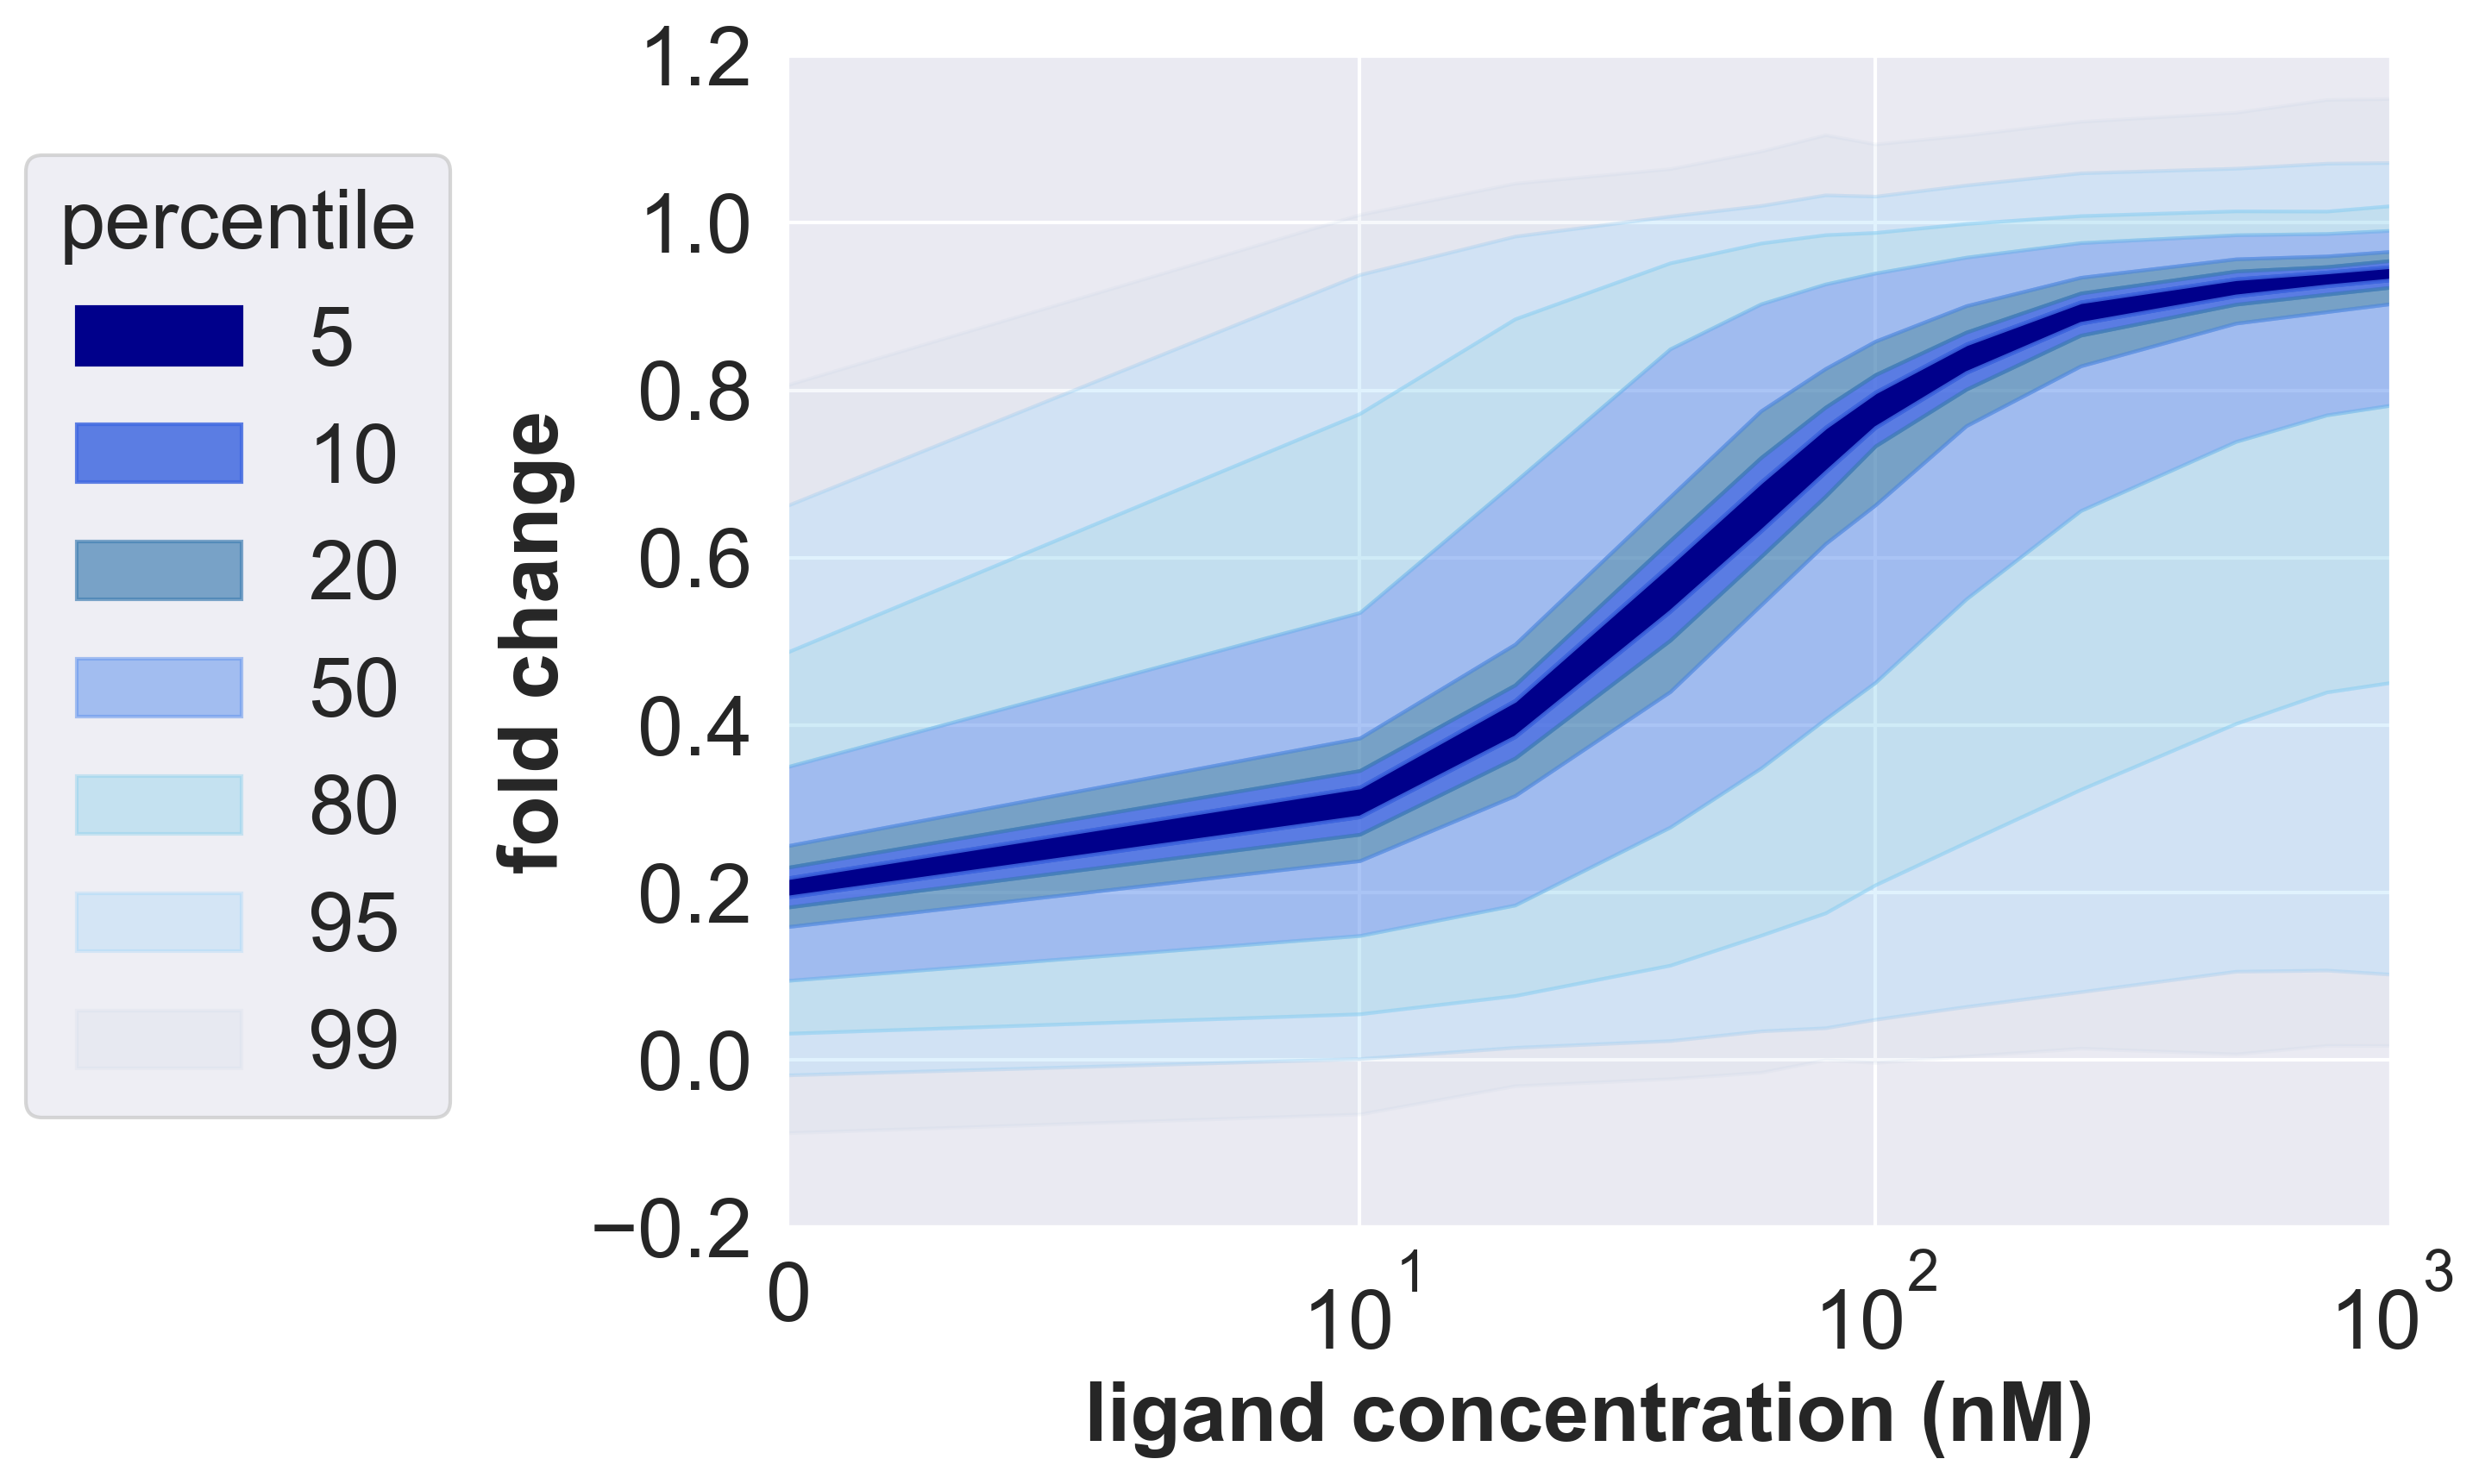

In [12]:
FC_prior_plot = plt.figure(figsize=(8,6),dpi=300)  # Fold-change predict plot
fcprior = FC_prior_plot.add_subplot(1,1,1)
fcprior.plot(C_ATC,fc_median,color='darkblue')
lbsz=23
color1,color2,color3,color4,color5,color6,color7 = 'darkblue','royalblue','steelblue','cornflowerblue','skyblue','lightskyblue','lightsteelblue'
fcprior.fill_between(C_ATC, fc_up5, fc_low5, alpha=1,label='5',color=color1)
fcprior.fill_between(C_ATC, fc_up10, fc_up5, alpha=.85,label='10',color=color2)
fcprior.fill_between(C_ATC, fc_low5, fc_low10, alpha=.85,color=color2)
fcprior.fill_between(C_ATC, fc_up20, fc_up10, alpha=.7,label='20',color=color3)
fcprior.fill_between(C_ATC, fc_low10, fc_low20, alpha=.7,color=color3)
fcprior.fill_between(C_ATC, fc_up50, fc_up20, alpha=.55,label='50',color=color4)
fcprior.fill_between(C_ATC, fc_low20, fc_low50, alpha=.55,color=color4)
fcprior.fill_between(C_ATC, fc_up80, fc_up50, alpha=.4,label='80',color=color5)
fcprior.fill_between(C_ATC, fc_low50, fc_low80, alpha=.4,color=color5)
fcprior.fill_between(C_ATC, fc_up95, fc_up80, alpha=.25,label='95',color=color6)
fcprior.fill_between(C_ATC, fc_low80, fc_low95, alpha=.25,color=color6)
fcprior.fill_between(C_ATC, fc_up99, fc_up95, alpha=.1,label='99',color=color7)
fcprior.fill_between(C_ATC, fc_low95, fc_low99, alpha=.1,color=color7)

fcprior.tick_params(labelsize=lbsz) # make ticks bigger
fcprior.set_ylim([-0.2, 1.2])
fcprior.set_xlim([0, 1000])
fcprior.set_yticks(np.arange(-0.2,1.21,0.2))
fcprior.set_ylabel('fold change', fontsize = lbsz, fontweight = 'bold')
fcprior.set_xlabel('ligand concentration (nM)', fontsize = lbsz, fontweight = 'bold')
fcprior.legend(bbox_to_anchor=(-0.5, 0.95), loc='upper left',title='percentile', ncol=1,fontsize=lbsz,title_fontsize=lbsz)
fcprior.set_xscale('symlog',linthresh=10)
# FC_prior_plot.tight_layout()
# FC_prior_plot.savefig('Figures/prior_predictive_check.png',dpi=300,bbox_inches='tight',pad_inches=0.01)

### Fig. S6

In [13]:
Rawpost=[]
for p in range(1,11):
    fnm='scc_data_postsample_one/postsample_batch{0:}_mcswp1000000_5.5_2.5_5.0_2.5_0.05.txt'.format(int(p))
    with open(fnm,'r') as f:
        alllines=f.readlines()
        for each in alllines[4][3:-4].split(']][['):
            tem=[] # tem is 1001*3
            for eac in each.split('], ['):
                tep=[float(ea) for ea in eac.split(',')]
                tem.append(tep)
            Rawpost.append(tem)
print(np.shape(Rawpost))

(1000, 1001, 3)


In [14]:
postsampl_el, postsampl_gama, postsampl_sigma=[],[],[]
for each in Rawpost:
    for i in range(1,1001):
        postsampl_el.append(each[i][0])
        postsampl_gama.append(each[i][1])
        postsampl_sigma.append(each[i][2])
print(len(postsampl_el))
print(len(postsampl_gama))
print(len(postsampl_sigma))

1000000
1000000
1000000


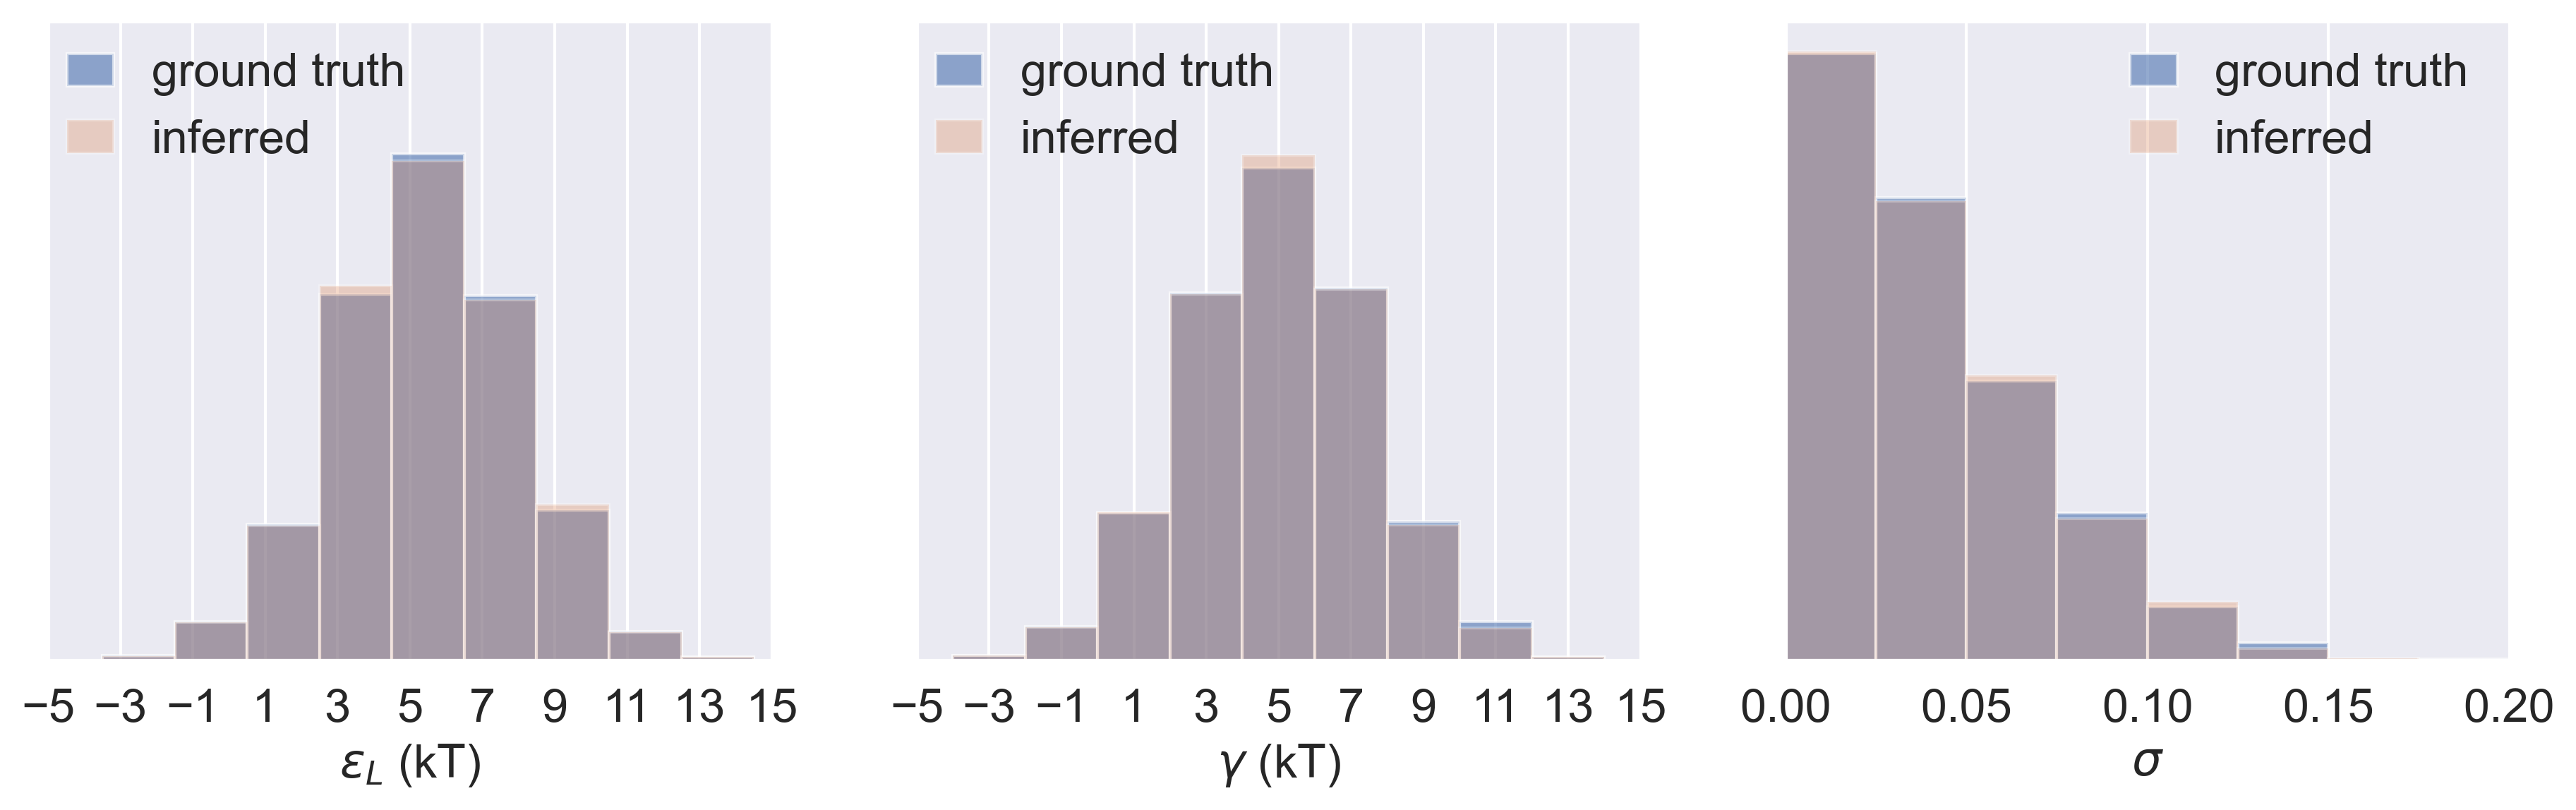

In [17]:
self_consistency_check = plt.figure(figsize=(15,4),dpi=300)

lablsiz=16

scc1 = self_consistency_check.add_subplot(131)
scc1.hist(np.asarray(Parameters)[:,1], density=True, alpha=0.6,label='ground truth', bins=np.arange(-3.5,15.5,2))
scc1.hist(postsampl_el[:], density=True, alpha=0.3,label='inferred', bins=np.arange(-3.5,15.5,2))
scc1.set_xlabel('$\epsilon_L$ (kT)',size=lablsiz)
scc1.set_xticks(np.arange(-5,17,2))
scc1.set_xlim([-5,15])
scc1.set_ylim([0,0.2])
# scc1.set_yticks(np.arange(0,0.21,0.05))
scc1.set_yticks([])
scc1.tick_params(labelsize=lablsiz)
scc1.legend(loc=[0,0.75], ncol=1,fontsize=lablsiz, frameon=False, handlelength=1)


scc2 = self_consistency_check.add_subplot(132)
scc2.hist(np.asarray(Parameters)[:,2], density=True, alpha=0.6,label='ground truth', bins=np.arange(-4,15,2))
scc2.hist(postsampl_gama[:], density=True, alpha=0.3,label='inferred', bins=np.arange(-4,15,2))
scc2.set_xlabel('$\gamma$ (kT)',size=lablsiz)
scc2.set_xticks(np.arange(-5,17,2))
scc2.set_xlim([-5,15])
scc2.set_ylim([0,0.2])
scc2.set_yticks(np.arange(0,0.21,0.05))
scc2.set_yticks([])
scc2.tick_params(labelsize=lablsiz)
scc2.legend(loc=[0,0.75], ncol=1,fontsize=lablsiz, frameon=False, handlelength=1)


scc3 = self_consistency_check.add_subplot(133)
scc3.hist(np.asarray(Parameters)[:,3], density=True, alpha=0.6,label='ground truth', bins=np.arange(0,0.3,0.025))
scc3.hist(postsampl_sigma[:], density=True, alpha=0.3,label='inferred', bins=np.arange(0,0.3,0.025))
scc3.set_xlabel('$\sigma$',size=lablsiz)
scc3.set_xticks(np.arange(0,0.21,0.05))
scc3.set_yticks([])
scc3.tick_params(labelsize=lablsiz)
scc3.set_xlim([0,0.2])
# scc3.set_ylim([0,15])
scc3.legend(loc=[0.45,0.75], ncol=1,fontsize=lablsiz, frameon=False, handlelength=1)

### Fig. S7A

In [23]:
Rank_el, Rank_gama, Rank_sigma = [],[],[]
cnt=0
for i in range(1000):
    if abs(Us[i][-1]-Us[i][0])>0*Parameters[i][3] and Us[i][-1]<1.97:
        cnt+=1
        bigger_el, bigger_gama, bigger_sigma =0,0,0
        
        for each in Rawpost[i][1:]:
            if each[0]>Parameters[i][1]: bigger_el+=1
            if each[1]>Parameters[i][2]: bigger_gama+=1
            if each[2]>Parameters[i][3]: bigger_sigma+=1
        Rank_el.append(bigger_el)
        Rank_gama.append(bigger_gama)
        Rank_sigma.append(bigger_sigma)
print(cnt)

1000


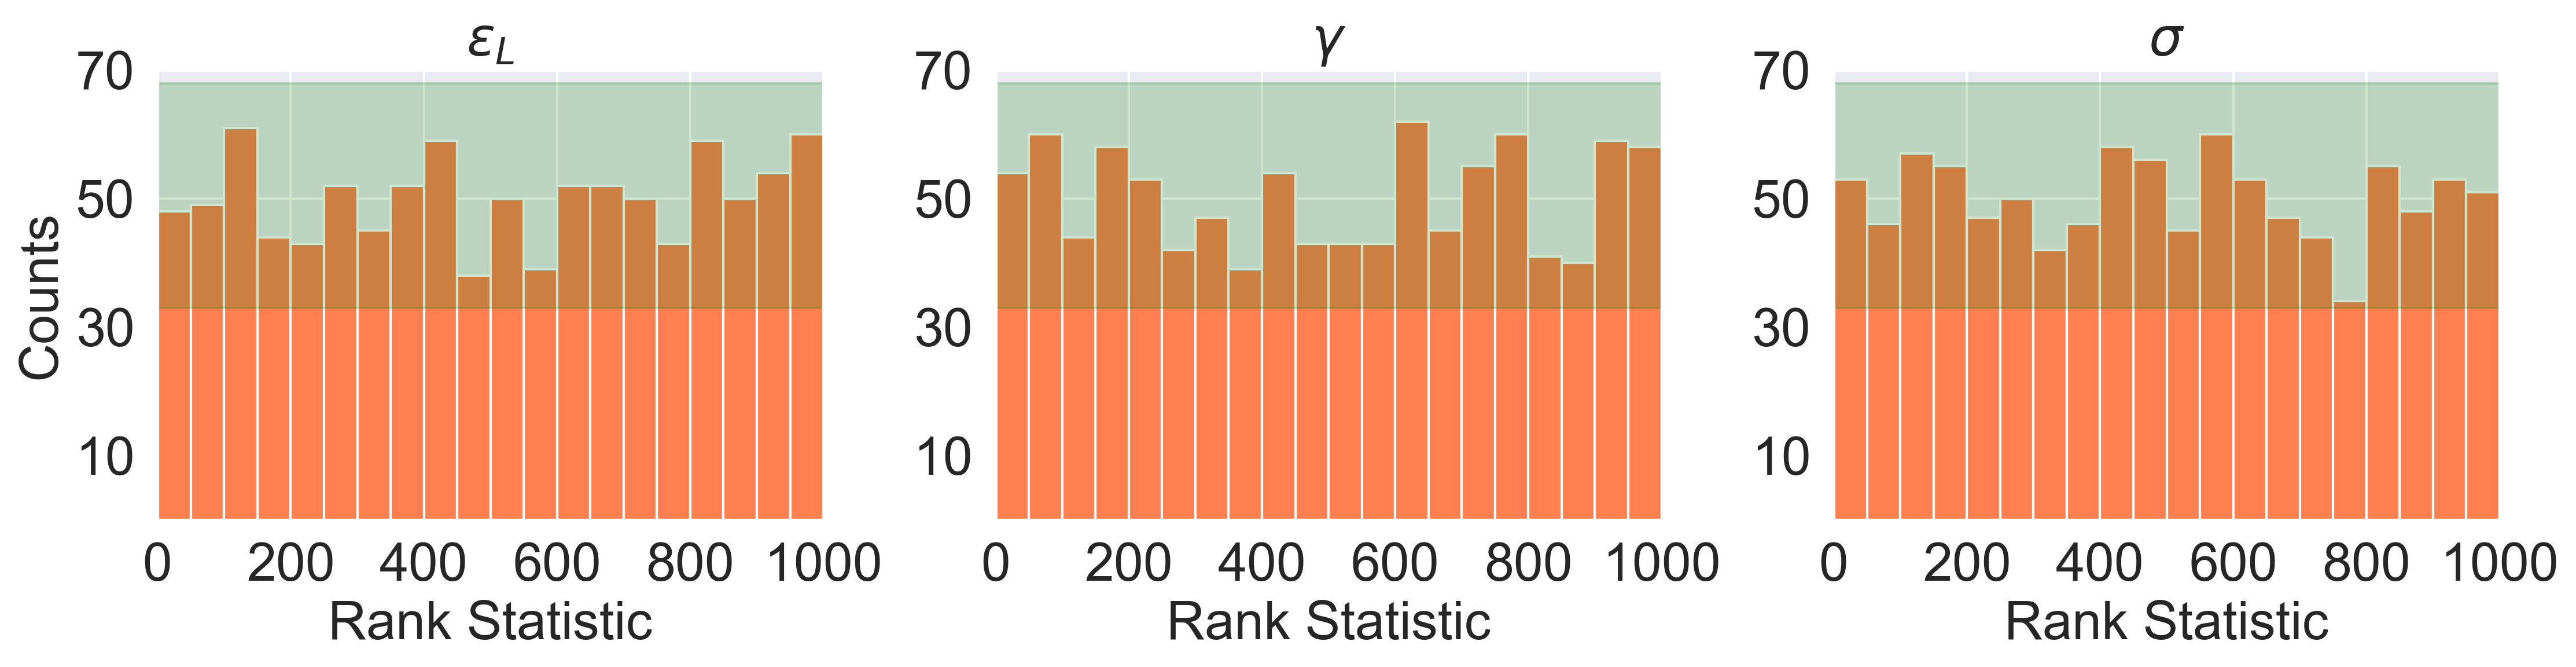

In [24]:
Rank_stat = plt.figure(figsize=(15,4),dpi=300)

lablsiz=22
rankcolor='coral'

rs1 = Rank_stat.add_subplot(131)
rs1.hist(Rank_el, density=False, alpha=1, bins=np.arange(0,1001,50),color=rankcolor)
rs1.set_xlabel('Rank Statistic',size=lablsiz)
rs1.set_ylabel('Counts',size=lablsiz)
rs1.set_xticks(np.arange(0,1001,200))
rs1.set_xlim([0,1000])
rs1.set_ylim([0,70])
rs1.set_yticks(np.arange(10,81,20))
rs1.tick_params(labelsize=lablsiz)
rs1.set_title('$\epsilon_L$', size=lablsiz)

x = np.arange(0.0, 1000.1, 0.1)
y1, y2 = 68,33
rs1.fill_between(x, y1, y2, color='green',alpha=0.2)

rs2 = Rank_stat.add_subplot(132)
rs2.hist(Rank_gama, density=False, alpha=1, bins=np.arange(0,1001,50),color=rankcolor)
rs2.set_xlabel('Rank Statistic',size=lablsiz)
rs2.set_xticks(np.arange(0,1001,200))
rs2.set_xlim([0,1000])
rs2.set_ylim([0,70])
rs2.set_yticks(np.arange(10,81,20))
rs2.tick_params(labelsize=lablsiz)
rs2.set_title('$\gamma$', size=lablsiz)
rs2.fill_between(x, y1, y2, color='green',alpha=0.2)

rs3 = Rank_stat.add_subplot(133)
rs3.hist(Rank_sigma, density=False, alpha=1, bins=np.arange(0,1001,50),color=rankcolor)
rs3.set_xlabel('Rank Statistic',size=lablsiz)
rs3.set_xticks(np.arange(0,1001,200))
rs3.set_xlim([0,1000])
rs3.set_ylim([0,70])
rs3.set_yticks(np.arange(10,81,20))
rs3.tick_params(labelsize=lablsiz)
rs3.set_title('$\sigma$', size=lablsiz)
rs3.fill_between(x, y1, y2, color='green',alpha=0.2)

Rank_stat.tight_layout()
# Rank_stat.savefig('Figures/FigS7_rankstat_hist.pdf',dpi=300,bbox_inches='tight',pad_inches=0.01)
# Rank_stat.savefig('Figures/FigS7_rankstat_hist.png',dpi=300,bbox_inches='tight',pad_inches=0.01)


### Fig. S7B

In [26]:
# Envelope of cdf 99%

R,n_sim =1000 ,1000
L = np.arange(0, n_sim+1, 1)

y = scipy.stats.randint.cdf(L, 0, R+1)
std = np.sqrt(y * (1 - y) / n_sim)

low_perc = np.concatenate((scipy.stats.norm.ppf(0.005, y[:-1], std[:-1]), (1.0, )))
high_perc = np.concatenate((scipy.stats.norm.ppf(0.995, y[:-1], std[:-1]), (1.0, )))

low_diff = low_perc - y
high_diff = high_perc-y

ybase_el = []
for rel in np.sort(Rank_el):
    ybase_el.append(y[rel])
    
ybase_gama = []
for rgama in np.sort(Rank_gama):
    ybase_gama.append(y[rgama])
    
ybase_sigma = []
for rsigma in np.sort(Rank_sigma):
    ybase_sigma.append(y[rsigma])

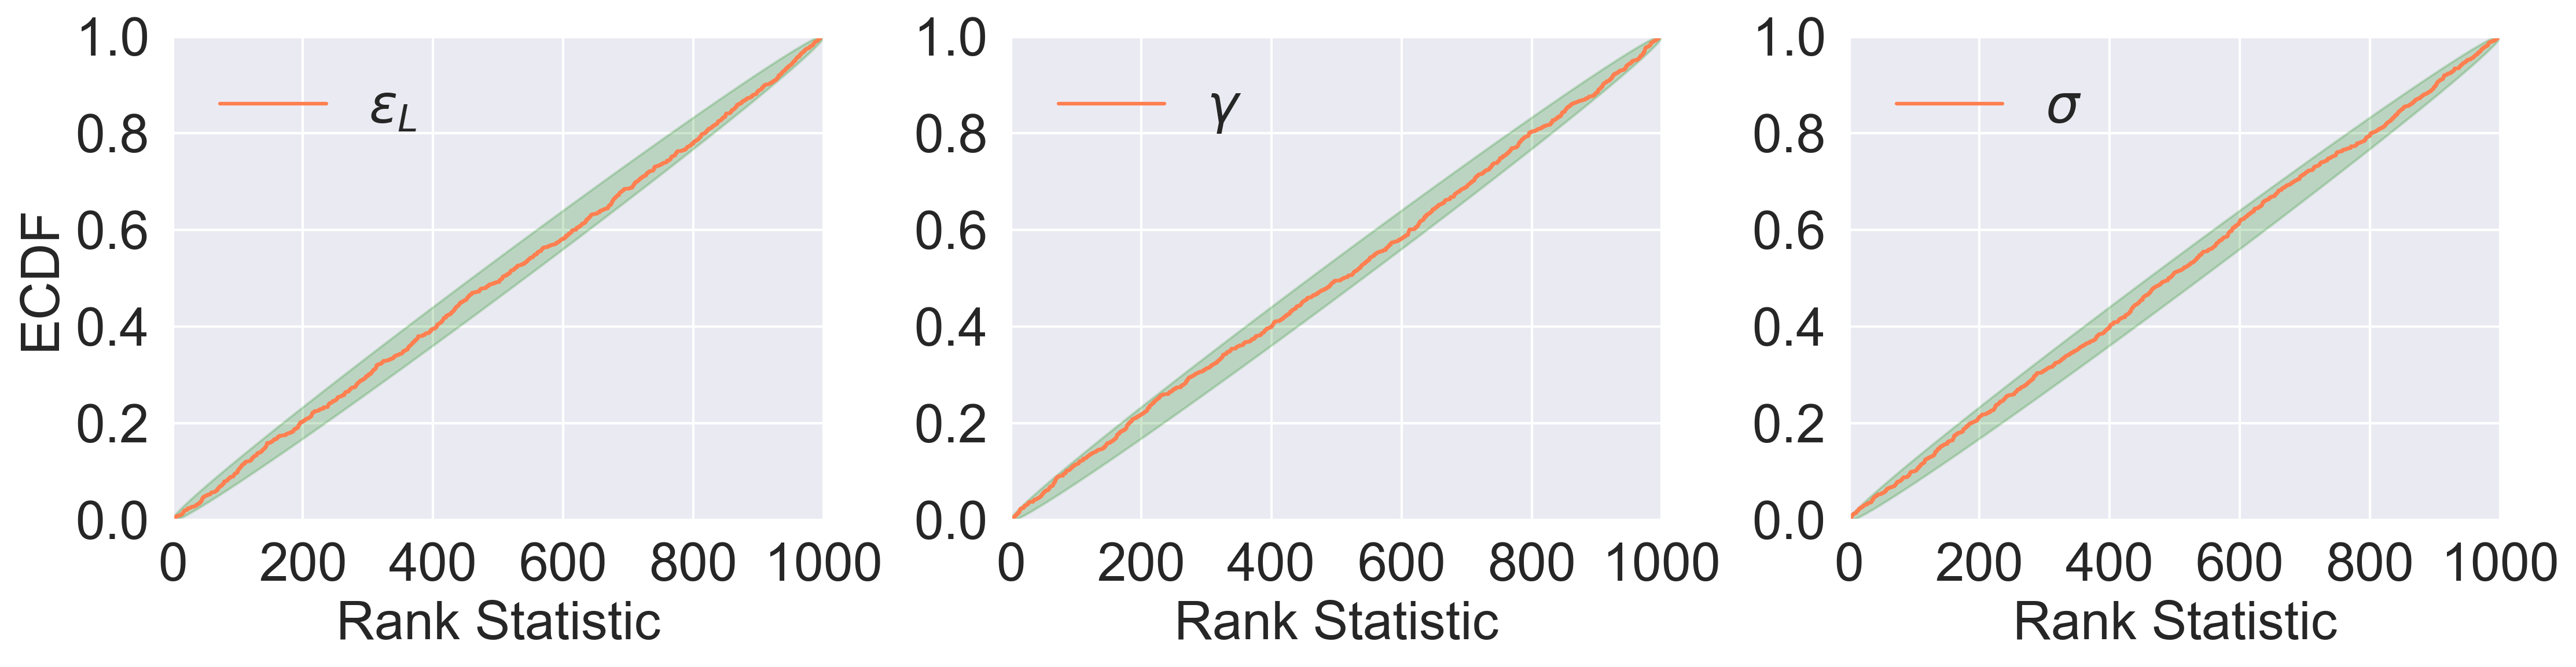

In [27]:
Ecdf = plt.figure(figsize=(15,4),dpi=300)
lablsiz=22

ecdf1 = Ecdf.add_subplot(131)
x, y = np.sort(Rank_el), np.arange(1, 1001, 1) / 1000
ecdf1.step(x, y, color=rankcolor,label='$\epsilon_L$')
ecdf1.fill_between(L, low_perc, high_perc, color='green', alpha=0.2)
ecdf1.set_xlabel('Rank Statistic',size=lablsiz)
ecdf1.set_ylabel('ECDF',size=lablsiz)
ecdf1.set_xticks(np.arange(0,1001,200))
ecdf1.set_xlim([-0.5,1001])
ecdf1.set_ylim([0,1])
ecdf1.set_yticks(np.arange(0,1.1,0.2))
ecdf1.tick_params(labelsize=lablsiz)
ecdf1.legend(loc='upper left', ncol=1,fontsize=lablsiz,frameon=False)

ecdf2 = Ecdf.add_subplot(132)
x, y = np.sort(Rank_gama), np.arange(1, 1001, 1) / 1000
ecdf2.step(x, y, color=rankcolor,label='$\gamma$')
ecdf2.fill_between(L, low_perc, high_perc, color='green', alpha=0.2)
ecdf2.set_xlabel('Rank Statistic',size=lablsiz)
ecdf2.set_xticks(np.arange(0,1001,200))
ecdf2.set_xlim([-0.5,1001])
ecdf2.set_ylim([0,1])
ecdf2.set_yticks(np.arange(0,1.1,0.2))
ecdf2.tick_params(labelsize=lablsiz)
ecdf2.legend(loc='upper left', ncol=1,fontsize=lablsiz,frameon=False)

ecdf3 = Ecdf.add_subplot(133)
x, y = np.sort(Rank_sigma), np.arange(1, 1001, 1) / 1000
ecdf3.step(x, y, color=rankcolor,label='$\sigma$')
ecdf3.fill_between(L, low_perc, high_perc, color='green', alpha=0.2)
ecdf3.set_xlabel('Rank Statistic',size=lablsiz)
ecdf3.set_xticks(np.arange(0,1001,200))
ecdf3.set_xlim([-0.5,1001])
ecdf3.set_ylim([0,1])
ecdf3.set_yticks(np.arange(0,1.1,0.2))
ecdf3.tick_params(labelsize=lablsiz)
ecdf3.legend(loc='upper left', ncol=1,fontsize=lablsiz, frameon=False)
Ecdf.tight_layout()
# Ecdf.savefig('Figures/FigS7_ecdf.pdf',dpi=300,bbox_inches='tight',pad_inches=0.01)
# Ecdf.savefig('Figures/FigS7_ecdf.png',dpi=300,bbox_inches='tight',pad_inches=0.01)

### Fig. S7C

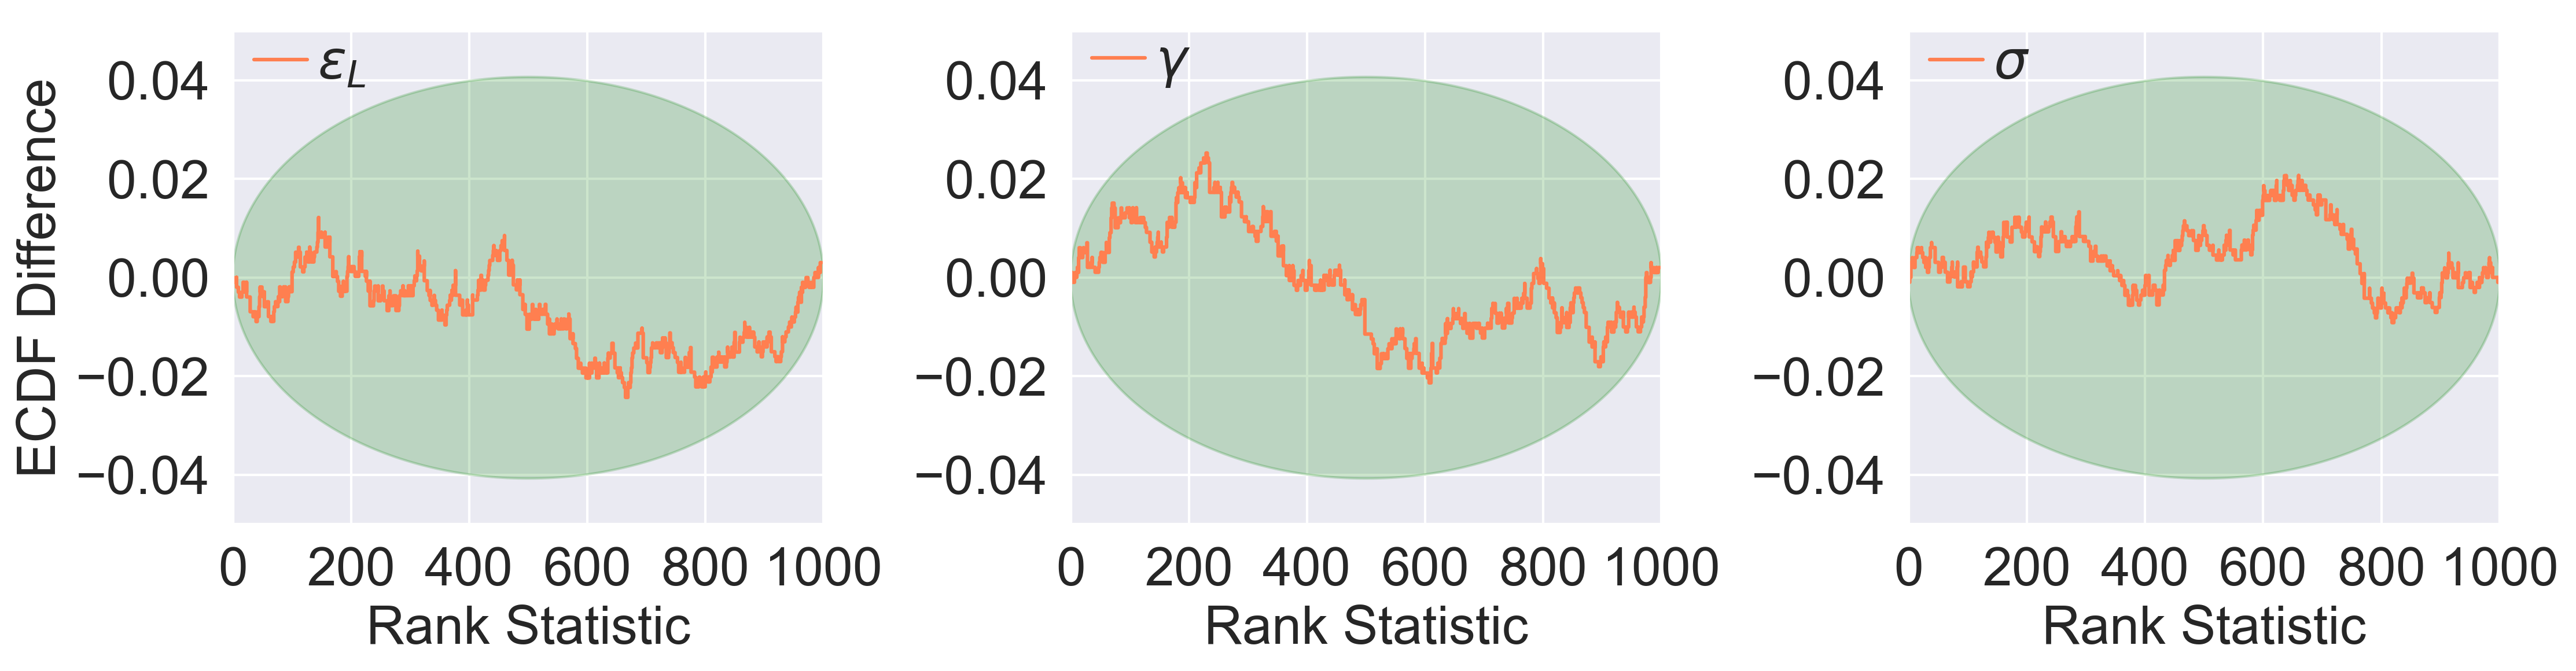

In [28]:
Ecdf_dif = plt.figure(figsize=(15,4),dpi=300)
lablsiz=22

ecdf_dif1 = Ecdf_dif.add_subplot(131)
x, y = np.sort(Rank_el), (np.arange(1, 1001, 1) / 1000)- np.asarray(ybase_el)
ecdf_dif1.step(x, y, color=rankcolor,label='$\epsilon_L$')
ecdf_dif1.fill_between(L, low_diff, high_diff, color='green', alpha=0.2)
ecdf_dif1.set_xlabel('Rank Statistic',size=lablsiz)
ecdf_dif1.set_ylabel('ECDF Difference',size=lablsiz)
ecdf_dif1.set_xticks(np.arange(0,1001,200))
ecdf_dif1.set_xlim([-0.5,1001])
ecdf_dif1.set_ylim([-0.05,0.05])
ecdf_dif1.set_yticks(np.arange(-0.04,0.041,0.02))
ecdf_dif1.tick_params(labelsize=lablsiz)
ecdf_dif1.legend(loc=[0,0.84], ncol=1,fontsize=lablsiz, frameon=False, handlelength=1,handletextpad=0.2)

ecdf_dif2 = Ecdf_dif.add_subplot(132)
x, y = np.sort(Rank_gama), np.arange(1, 1001, 1) / 1000-np.asarray(ybase_gama)
ecdf_dif2.step(x, y, color=rankcolor,label='$\gamma$')
ecdf_dif2.fill_between(L, low_diff, high_diff, color='green', alpha=0.2)
ecdf_dif2.set_xlabel('Rank Statistic',size=lablsiz)
ecdf_dif2.set_xticks(np.arange(0,1001,200))
ecdf_dif2.set_xlim([-0.5,1001])
ecdf_dif2.set_ylim([-0.05,0.05])
ecdf_dif2.set_yticks(np.arange(-0.04,0.041,0.02))
ecdf_dif2.tick_params(labelsize=lablsiz)
ecdf_dif2.legend(loc=[0,0.84], ncol=1,fontsize=lablsiz, frameon=False, handlelength=1,handletextpad=0.2)

ecdf_dif3 = Ecdf_dif.add_subplot(133)
x, y = np.sort(Rank_sigma), np.arange(1, 1001, 1) / 1000-np.asarray(ybase_sigma)
ecdf_dif3.step(x, y, color=rankcolor,label='$\sigma$')
ecdf_dif3.fill_between(L, low_diff, high_diff, color='green', alpha=0.2)
ecdf_dif3.set_xlabel('Rank Statistic',size=lablsiz)
ecdf_dif3.set_xticks(np.arange(0,1001,200))
ecdf_dif3.set_xlim([0,1000])
ecdf_dif3.set_ylim([-0.05,0.05])
ecdf_dif3.set_yticks(np.arange(-0.04,0.041,0.02))
ecdf_dif3.tick_params(labelsize=lablsiz)
ecdf_dif3.legend(loc=[0,0.84], ncol=1,fontsize=lablsiz, frameon=False, handlelength=1,handletextpad=0.2)
Ecdf_dif.tight_layout()
# Ecdf_dif.savefig('Figures/FigS7_ecdf_diff.pdf',dpi=300,bbox_inches='tight',pad_inches=0.01)
# Ecdf_dif.savefig('Figures/FigS7_ecdf_diff.png',dpi=300,bbox_inches='tight',pad_inches=0.01)


### Fig. S8

In [31]:
el_avg, el_std = 5.5,2.5
gama_avg, gama_std = 5, 2.5
sigma_std=0.05

In [29]:
def Var(listt):
    var=0
    muu=np.mean(listt)
    for each in listt: var+=(each-muu)**2
    return var/len(listt)

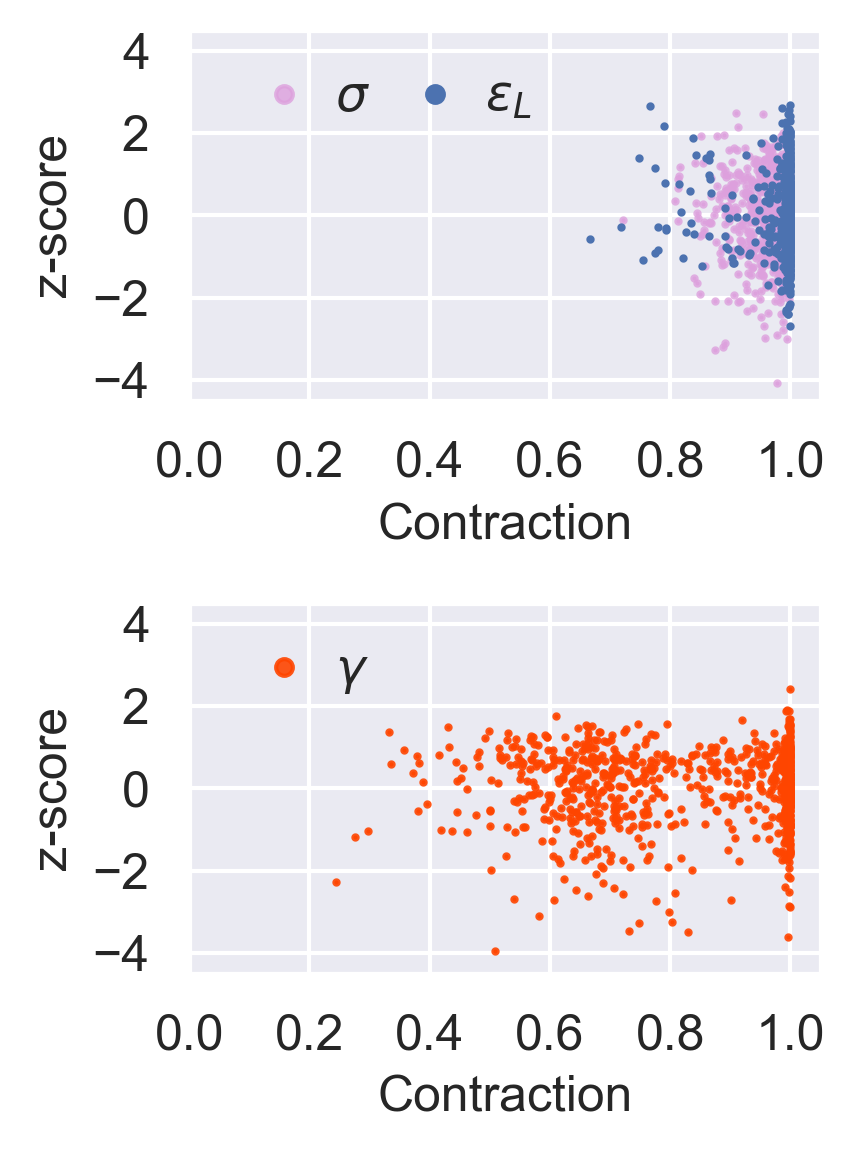

In [33]:
# for each of the 1000 sets of lkns, el, gama, sigma Parameters[i]
# the inferred params are Rawpost[i], containing 100001 sets of inferred el,gama,sigma for this Parameters[i]
Z_el, Z_gama, Z_sigma = [],[],[]
S_el, S_gama, S_sigma = [],[],[]
cnt=0
for x in range(1000):
    if abs(Us[x][-1]-Us[x][0])>=2*Parameters[x][3]:   # and Us[x][-1]<=.97: impose this for Fig. S8B
        cnt+=1
        elh = Parameters[x][1]
        gamah = Parameters[x][2]
        sigmah = Parameters[x][3]

        el_infr, gama_infr, sigma_infr = [],[],[]
        for each in Rawpost[x][:]:
            el_infr.append(each[0])
            gama_infr.append(each[1])
            sigma_infr.append(each[2])
        el_infr, gama_infr, sigma_infr = np.sort(el_infr),np.sort(gama_infr),np.sort(sigma_infr)
        var_el_infr,var_gama_infr,var_sigma_infr = Var(el_infr), Var(gama_infr), Var(sigma_infr)

        z_el = (np.mean(el_infr)-elh)/(np.sqrt(var_el_infr))
        z_gama = (np.mean(gama_infr)-gamah)/(np.sqrt(var_gama_infr))
        z_sigma = (np.mean(sigma_infr)-sigmah)/(np.sqrt(var_sigma_infr))

        s_el = 1- (var_el_infr)/(el_std**2)
        s_gama = 1- (var_gama_infr)/(gama_std**2)
        s_sigma = 1- (var_sigma_infr)/(sigma_std**2*(1-2/np.pi))

#         if z_gama<-3:
#             print(Parameters[x], s_gama)

        Z_el.append(z_el)
        Z_gama.append(z_gama)
        Z_sigma.append(z_sigma)

        S_el.append(s_el)
        S_gama.append(s_gama)
        S_sigma.append(s_sigma)
    
SZ_check = plt.figure(figsize=(3,4),dpi=300)
sz = SZ_check.add_subplot(211)
sz.plot(S_sigma, Z_sigma,'.',label='$\sigma$',markersize=2,color='#DDA0DD',alpha=0.8)
sz.plot(S_el, Z_el,'.',label='$\epsilon_L$',markersize=2, alpha=1)
sz.set_xlabel('Contraction',fontsize=12)
sz.set_ylabel('z-score',fontsize=12)
sz.tick_params(labelsize=12)
sz.set_yticks(np.arange(-4,5,2))
sz.set_xticks(np.arange(-0,1.1,0.2))
sz.set_ylim([-4.5,4.5])
sz.set_xlim([0,1.05])
sz.legend(loc='upper left', ncol=1,fontsize=6)
sz.legend(ncol=3, frameon=False, fontsize=12,markerscale=4,columnspacing=0.3,handletextpad=0.01)

sz2 = SZ_check.add_subplot(212)
sz2.plot(S_gama, Z_gama,'.',label='$\gamma$',markersize=2, color='#FF4500',alpha=0.9)
sz2.set_xlabel('Contraction',fontsize=12)
sz2.set_ylabel('z-score',fontsize=12)
sz2.tick_params(labelsize=12)
sz2.set_yticks(np.arange(-4,5,2))
sz2.set_xticks(np.arange(-0,1.1,0.2))
sz2.set_ylim([-4.5,4.5])
sz2.set_xlim([0,1.05])
sz2.legend(loc='upper left', ncol=1,fontsize=6)
sz2.legend(ncol=3, frameon=False, fontsize=12,markerscale=4,columnspacing=0.3,handletextpad=0.01)

SZ_check.tight_layout()

# SZ_check.savefig('Figures/FigS8_z-c_full.pdf',dpi=300,bbox_inches='tight',pad_inches=0.01)
# SZ_check.savefig('Figures/FigS8_z-c_full.png',dpi=300,bbox_inches='tight',pad_inches=0.01)

# SZ_check.savefig('Figures/FigS8_z-c_d97.pdf',dpi=300,bbox_inches='tight',pad_inches=0.01)
# SZ_check.savefig('Figures/FigS8_z-c_d97.png',dpi=300,bbox_inches='tight',pad_inches=0.01)
